# Bank Account Fraud Detection

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

In [33]:
# import data
data = pd.read_csv('../data/raw/raw_data.csv')
print(f"data shape: {data.shape}")
data.head()

data shape: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Data Cleaning

1. Split into numerical and categorical columns
2. Check number of missing values

In [34]:
# define categorical and numerical columns
categorical_columns = ['fraud_bool', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w']

# define numerical columns, everything else
numerical_columns = [col for col in data.columns if col not in categorical_columns]

In [35]:
# change datatype of categorical columns to 'category'
data[categorical_columns] = data[categorical_columns].astype('category')

In [36]:
# print columnn names
data.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [37]:
# columns with potential missing values
na_cols = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# check for missing values, if values are -1 or negative, they are considered missing
missing = data[na_cols].replace(-1, np.nan).isnull().sum().to_frame().reset_index()
missing.columns = ['columns', 'na_count']
missing['na_percentage'] = round(missing['na_count'] / data.shape[0] * 100, 2)
missing

,columns,na_count,na_percentage
0,prev_address_months_count,712920,71.29
1,current_address_months_count,4254,0.43
2,intended_balcon_amount,0,0.00
3,bank_months_count,253635,25.36
4,session_length_in_minutes,2015,0.20
5,device_distinct_emails_8w,359,0.04


## EDA Bank Activity and Device Activity

* Device Activity:
    * `session_length_in_minutes`
    * `device_os`
    * `keep_alive_session`
    * `device_distinct_emails_8w`
    * `device_fraud_count` (can drop this column)
    * `source`
    * `foreign_request`

* Bank Activity:
    * `zip_count_4w`
    * `velocity_6h`
    * `velocity_24h`
    * `velocity_4w`
    * `bank_branch_count_8w`
    * `date_of_birth_distinct_emails_4w`


In [38]:
# select columns related to device activity
device_activity  = ['fraud_bool', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'source', 'foreign_request']
device_activity_df = data[device_activity]

# print shape
device_activity_df.shape

(1000000, 7)

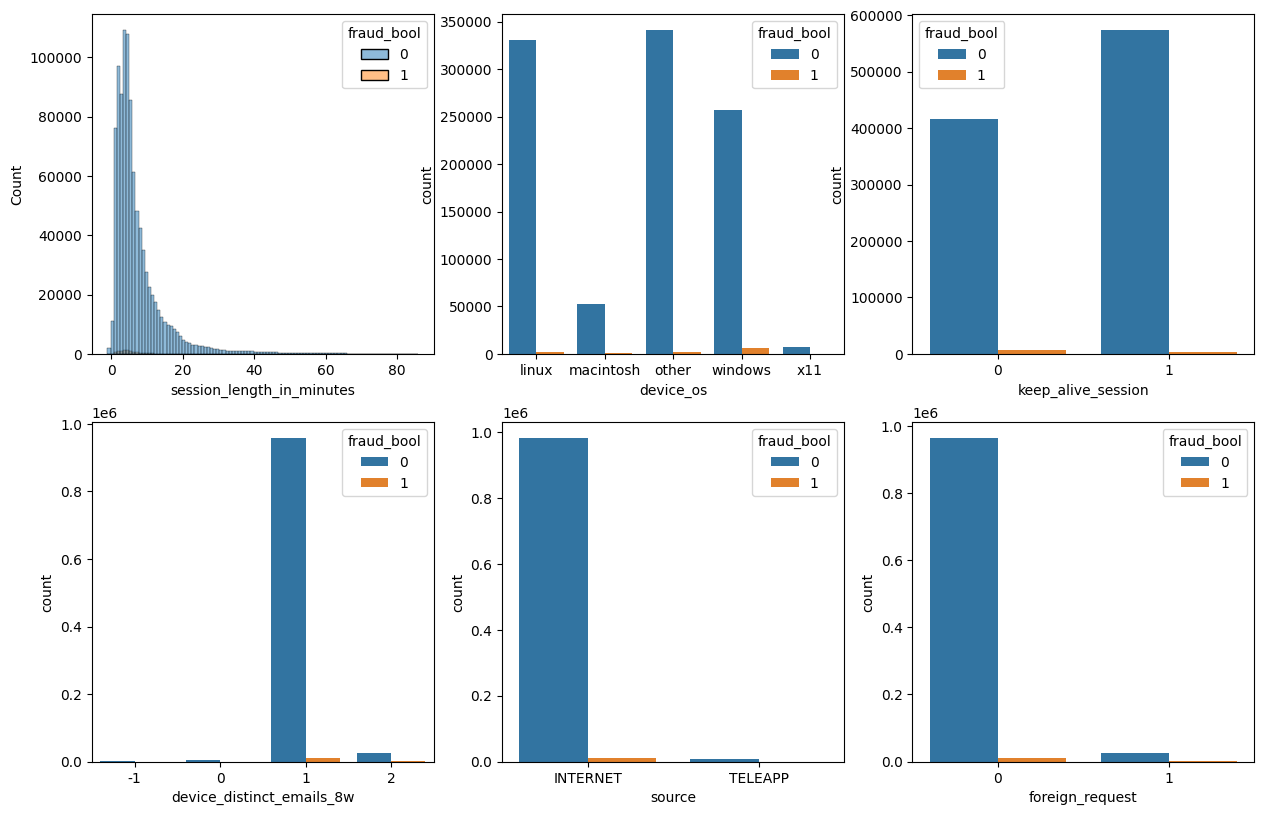

In [39]:
# for each column, if it is categorical, plot the value counts, if it is numerical, plot histogram
# put in a 3 x 3 grid, and color code the fraud_bool column
# print all except the first column
plt.figure(figsize=(15, 15))
for i, col in enumerate(device_activity_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    if device_activity_df[col].dtype.name == 'category':
        sns.countplot(data=device_activity_df, x=col, hue='fraud_bool')
    else:
        sns.histplot(data=device_activity_df, x=col, hue='fraud_bool', bins=100)

In [40]:
# split session_length_in_minutes into 2 groups, fraud and non-fraud
session_length_fraud = device_activity_df[device_activity_df['fraud_bool'] == 1][['session_length_in_minutes', 'fraud_bool']]
sessions_length_non_fraud = device_activity_df[device_activity_df['fraud_bool'] == 0][['session_length_in_minutes', 'fraud_bool']]

# print shapes
print(f"fraud shape: {session_length_fraud.shape}")
print(f"non-fraud shape: {sessions_length_non_fraud.shape}")

fraud shape: (11029, 2)
non-fraud shape: (988971, 2)


<Axes: xlabel='session_length_in_minutes'>

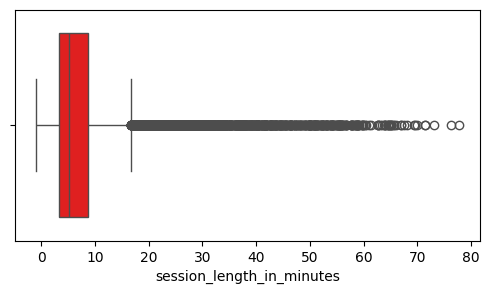

In [41]:
# plot boxplot for non-fraud session length in minutes
# plot side by side, with different colors, on columns 'session_length_in_minutes'
plt.figure(figsize=(6, 3))
sns.boxplot(data=session_length_fraud, x='session_length_in_minutes', color='red')

<Axes: xlabel='session_length_in_minutes'>

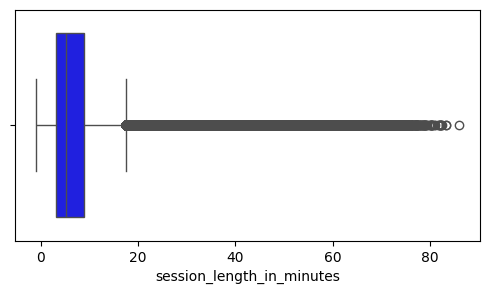

In [42]:
# plot boxplot for non-fraud session length in minutes
plt.figure(figsize=(6, 3))
sns.boxplot(data=sessions_length_non_fraud, x='session_length_in_minutes', color='blue')

In [43]:
# check value_counts for device_distinct_emails_8w
device_activity_df['device_distinct_emails_8w'].value_counts()

device_distinct_emails_8w
1     968067
2      25302
0       6272
-1       359
Name: count, dtype: int64

Text(0.5, 1.0, 'Non-Fraud')

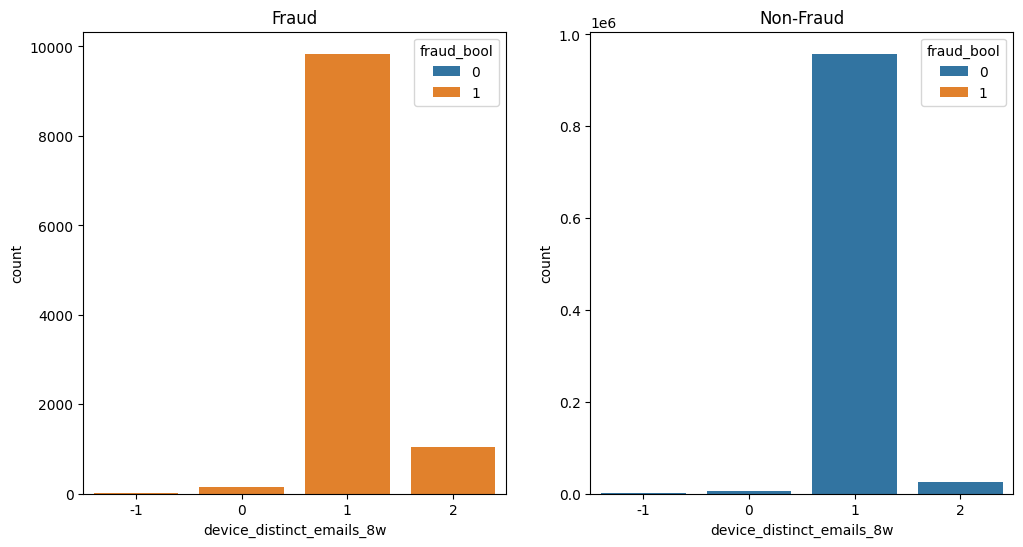

In [44]:
# select device_distinct_emails_8w and fraud_bool columns, and select all the frauds
device_distinct_emails_fraud = device_activity_df[device_activity_df['fraud_bool'] == 1][['device_distinct_emails_8w', 'fraud_bool']]
device_distinct_emails_non_fraud = device_activity_df[device_activity_df['fraud_bool'] == 0][['device_distinct_emails_8w', 'fraud_bool']]

# plot count plot for both fraud and non-fraud, in 1 x 2 grid, provide title for each
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=device_distinct_emails_fraud, x='device_distinct_emails_8w', hue='fraud_bool')
plt.title('Fraud')
plt.subplot(1, 2, 2)
sns.countplot(data=device_distinct_emails_non_fraud, x='device_distinct_emails_8w', hue='fraud_bool')
plt.title('Non-Fraud')


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_2737/1828989638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['device_os'] = device_activity_df['device_os'].astype(str)
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_2737/1828989638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype(str)
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_2737/1828989638.py:5: Set

<Axes: xlabel='device_os_keep_alive', ylabel='count'>

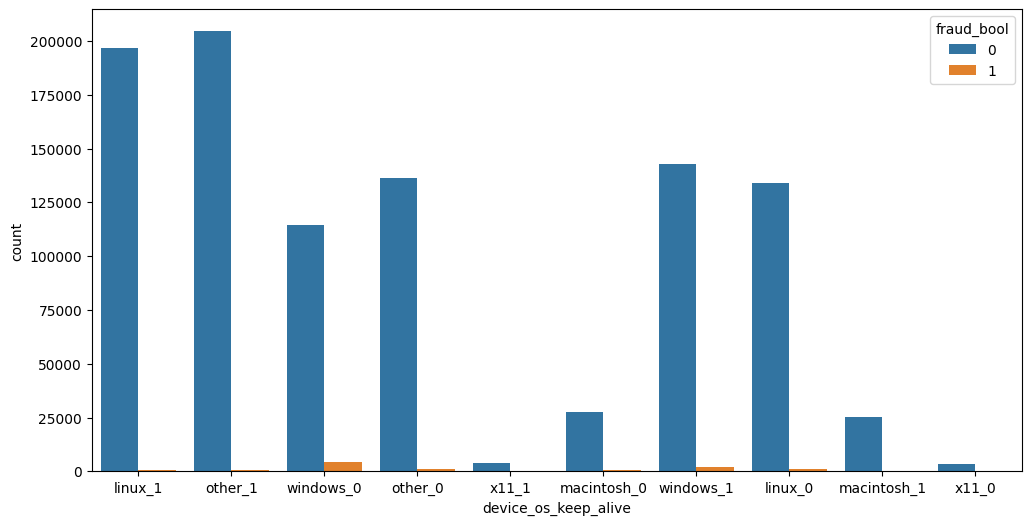

In [61]:
# use the device_activity_df, combine the device_os and keep_alive_sessions columns
# change device_os and keep_alive_session to str
device_activity_df['device_os'] = device_activity_df['device_os'].astype(str)
device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype(str)
device_activity_df['device_os_keep_alive'] = device_activity_df['device_os'] + '_' + device_activity_df['keep_alive_session']

# plot countplot for device_os_keep_alive
plt.figure(figsize=(12, 6))
sns.countplot(data=device_activity_df, x='device_os_keep_alive', hue='fraud_bool')

In [66]:
# group by device_os_keep_alive
device_os_keep_alive_grouped = device_activity_df.groupby('device_os_keep_alive')
device_os_keep_alive_grouped['fraud_bool'].value_counts()

device_os_keep_alive  fraud_bool
linux_0               0             134063
                      1               1066
linux_1               0             196934
                      1                649
macintosh_0           0              27829
                      1                561
macintosh_1           0              25245
                      1                191
other_0               0             136348
                      1               1266
other_1               0             204406
                      1                708
windows_0             0             114302
                      1               4312
windows_1             0             142697
                      1               2195
x11_0                 0               3250
                      1                 56
x11_1                 0               3897
                      1                 25
Name: count, dtype: int64

In [71]:
# group by device_os_keep_alive
# i want a 10 x 2 grid
# each row have 2 grids the left grid is a histogram, where the x-axis is session_length_in_minutes for fraud, and the right grid is for non-fraud
# color coded by fraud_bool
# use the device_activity_df
nrows = 10; ncols = 2
plt.figure(figsize=(10, 20))
for i, (name, group) in enumerate(device_activity_df.groupby('device_os_keep_alive')):
    print(i, name, group.shape)
    # select fraud and non-fraud
    fraud = group[group['fraud_bool'] == 1]; print(f'fraud shape: {fraud.shape}')
    non_fraud = group[group['fraud_bool'] == 0]; print(f'non_fraud shape: {non_fraud.shape}')
    # plot, color for fraud is red, color for non-fraud is blue
    plt.subplot(nrows, ncols, i+1)
    sns.histplot(data=fraud, x='session_length_in_minutes', bins=100, color='red')
    plt.title(f'{name} - Fraud')
    plt.subplot(nrows, ncols, i+2)
    sns.histplot(data=non_fraud, x='session_length_in_minutes', bins=100, color='blue')
    plt.title(f'{name} - Non-Fraud')

0 linux_0 (135129, 8)
fraud shape: (1066, 8)
non_fraud shape: (134063, 8)


ValueError: num must be an integer with 1 <= num <= 20, not 0

<Figure size 1000x2000 with 0 Axes>

fraud shape: (10689, 2)


<Axes: xlabel='session_length_in_minutes'>

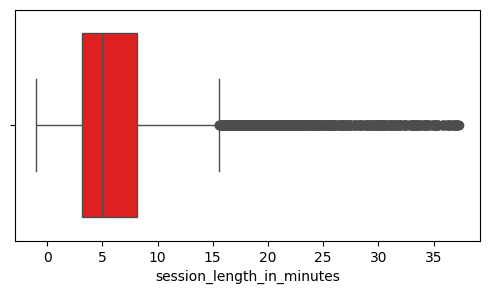

In [15]:
# remove outliers for both fraud and non-fraud
# remove outliers for fraud, within 3 standard deviations, and print shape, and plot boxplot
session_length_fraud = session_length_fraud[session_length_fraud['session_length_in_minutes'] < session_length_fraud['session_length_in_minutes'].mean() + 3 * session_length_fraud['session_length_in_minutes'].std()]
print(f"fraud shape: {session_length_fraud.shape}")
plt.figure(figsize=(6, 3))
sns.boxplot(data=session_length_fraud, x='session_length_in_minutes', color='red')